In [1]:
from sklearn.datasets import make_classification
import numpy as np 
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
import matplotlib.pyplot as plt

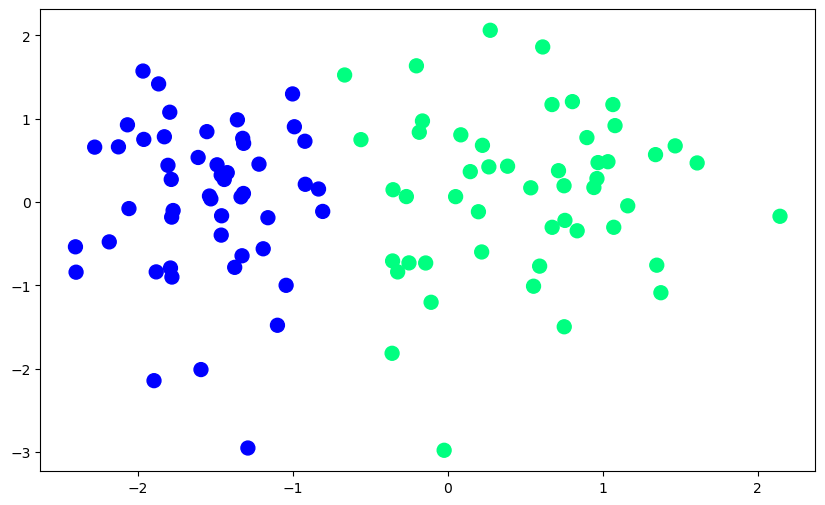

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [5]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [7]:
np.dot(np.insert(X[41],0,1),[1,1,1])

0.2946000908036749

In [11]:
y[41]

0

In [9]:
step(0.294)

1

In [10]:
step(-0.294)

0

In [8]:
def step(z):
    return 1 if z>0 else 0

In [12]:
intercept_, coef_ = perceptron(X,y)

In [13]:
print(coef_)
print(intercept_)

[1.3786921  0.14423576]
0.8


In [14]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [15]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b

(-3.0, 2.0)

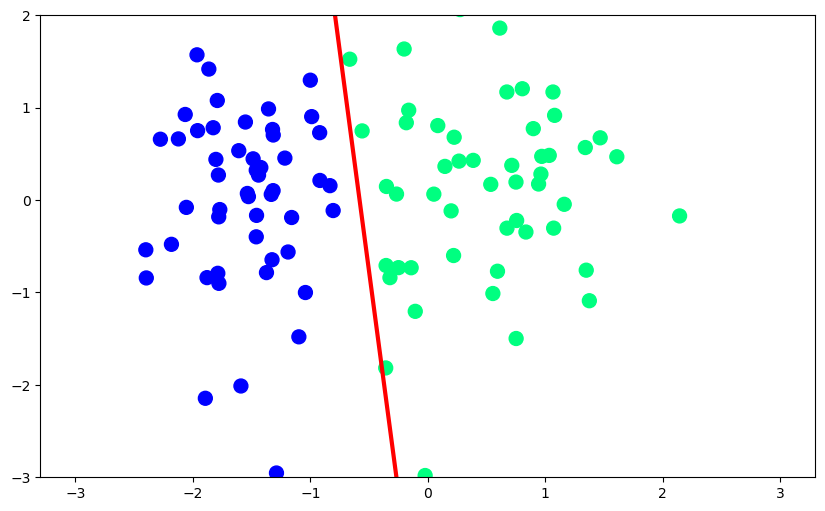

In [17]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [19]:
def perceptron(X,y):

    m = []
    b = []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [20]:
m,b = perceptron(X,y)

In [26]:
pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
%matplotlib ipympl
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

RuntimeError: 'ipympl is not a recognised GUI loop or backend name

In [28]:
fig, ax = plt.subplots(figsize=(9,5))

X_i = np.arange(-3,3,0.1)
y_i = X_i*m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(X_i, X_i*m[0] + b[0], 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(X_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line,

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
